In [ ]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

folder = "TGA"
filename = os.listdir(folder)

In [ ]:
filename

['PORTOBELLO.xlsx',
 'MEMPHIS.xlsx',
 'BRONX.xlsx',
 'BERKELEY.xlsx',
 'MONTANA.xlsx']

In [ ]:
colom  = ['DEPTH', 'GR', 'ResD', 'RHOB', 'NPHI', 'DTS','PE']
a = 0
for i in range(len(filename)):
  da = pd.read_excel(folder+"/"+filename[i])
  da = da.drop(columns = ['FACIES'])
  if len(da.columns)  > 6:
    # da = da.drop(columns = ['PE'])
    da.columns = colom
    da['WELL'] = [filename[i].split('.')[0] for k in range(len(da))]
    a = a + 1
    if a == 1:
      data = da
    else:
      data = pd.concat([data,da], axis=0)
data_all = pd.read_csv('data_all_fix.csv',sep = ",")

In [ ]:
well_train = data["WELL"].unique()
data = data.replace([-999,-999.25],np.nan)
data = data.dropna()
data = data[data['ResD']<200]
well_train

array(['MEMPHIS', 'BRONX', 'MONTANA'], dtype=object)

In [ ]:
for i in range(len(well_train)):
  a = data_all[data_all['WELL'] == well_train[i]]['norm_GR'].values
  b = data_all[data_all['WELL'] == well_train[i]]['norm_ResD'].values
  c = data_all[data_all['WELL'] == well_train[i]]['norm_RHOB'].values
  d = data_all[data_all['WELL'] == well_train[i]]['norm_NPHI'].values
  e = data_all[data_all['WELL'] == well_train[i]]['norm_DTS'].values
  if i == 0:
    da = a
    db = b
    dc = c
    dd = d
    de = e
  else:
    da = np.concatenate((da,a))
    db = np.concatenate((db,b))
    dc = np.concatenate((dc,c))
    dd = np.concatenate((dd,d))
    de = np.concatenate((de,e))
data['norm_gr'] = da
data['norm_ResD'] = db
data['norm_RHOB'] = dc
data['norm_NPHI'] = dd
data['norm_DTS'] = de

In [ ]:
X_feature = ['norm_gr', 'norm_ResD', 'norm_RHOB', 'norm_NPHI', 'norm_DTS']
y_feature = ['PE']
MD = data['DEPTH']

In [ ]:
import numpy as np
from numpy import asarray
from numpy import mean
from numpy import std
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import RepeatedKFold
from keras.callbacks import History 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
model = Sequential()
def get_model(n_input, n_output):
    model.add(Dense(20, input_dim=n_input, activation='relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(56, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(123, activation='relu'))
    model.add(Dense(60, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))

    model.add(Dense(n_output))
    model.compile(loss='mae', optimizer='adam')
    return model

def evaluate_model(X, y):
    history  = History()
    n_input, n_output = X.shape[1], y.shape[1]
    X_train, X_test, y_train, y_test = train_test_split(np.array(X),np.array(y),test_size = 0.3,shuffle=True)
    model = get_model(n_input, n_output)
    model.fit(X_train, y_train, verbose=1, epochs=100, callbacks = [history],validation_data=(X_test, y_test))
    mae = model.evaluate(X_test, y_test, verbose=0)

      #  break
    print(mae)
    return history

In [ ]:
X = data[X_feature].values
y = data[y_feature].values


In [ ]:
from scipy.stats import pearsonr

# prepare data

# calculate Pearson's correlation
for i in range(len(X_feature)):
  for j in range(len(y_feature)):
    corr, _ = pearsonr(X[:,i],y[:,j])
    print('{} &\t {}: \t{}'.format(X_feature[i],y_feature[j],corr))

norm_gr &	 PE: 	-0.24419898665907708
norm_ResD &	 PE: 	0.10877149483476492
norm_RHOB &	 PE: 	0.10400909100870571
norm_NPHI &	 PE: 	-0.008756842637563544
norm_DTS &	 PE: 	-0.2039423862850397


In [ ]:
scaler = StandardScaler().fit(X)
scaled_features = scaler.transform(X)
# y.shape
history = evaluate_model(scaled_features,y)

Epoch 1/100
539/539 [==============================] - 3s 4ms/step - loss: 3.1565 - val_loss: 2.8018
Epoch 2/100
539/539 [==============================] - 2s 3ms/step - loss: 2.5781 - val_loss: 2.5685
Epoch 3/100
539/539 [==============================] - 2s 3ms/step - loss: 2.4153 - val_loss: 2.3858
Epoch 4/100
539/539 [==============================] - 2s 3ms/step - loss: 2.3066 - val_loss: 2.2694
Epoch 5/100
539/539 [==============================] - 2s 3ms/step - loss: 2.2355 - val_loss: 2.2822
Epoch 6/100
539/539 [==============================] - 2s 3ms/step - loss: 2.1920 - val_loss: 2.2547
Epoch 7/100
539/539 [==============================] - 2s 3ms/step - loss: 2.1373 - val_loss: 2.1495
Epoch 8/100
539/539 [==============================] - 2s 3ms/step - loss: 2.1026 - val_loss: 2.1632
Epoch 9/100
539/539 [==============================] - 2s 3ms/step - loss: 2.0578 - val_loss: 2.0671
Epoch 10/100
539/539 [==============================] - 2s 3ms/step - loss: 2.0243 - val_lo

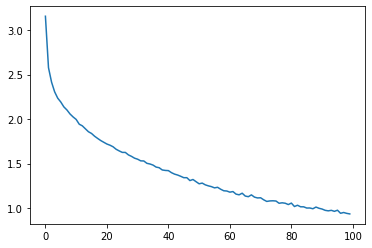

In [ ]:
plt.plot(history.history['loss'])

1.0282120415592018
0.7974357134329411


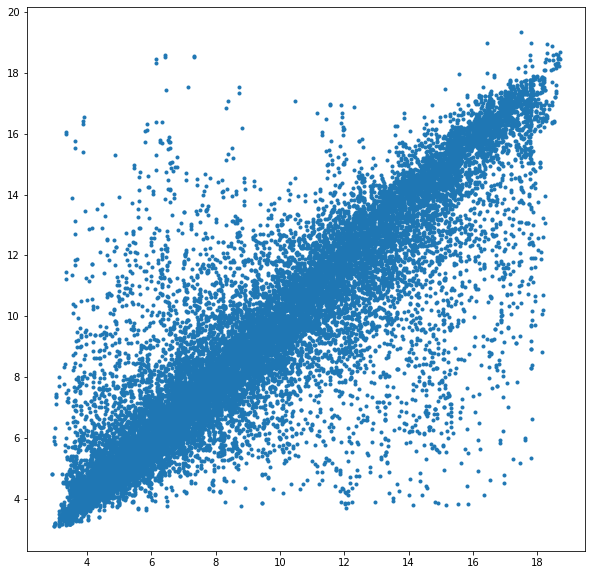

In [ ]:
prediksi = model.predict(scaled_features)
plt.figure(figsize=(10,10))

plt.plot(data[y_feature],prediksi,'.')

from sklearn.metrics import mean_absolute_error as mae
print(mae(data[y_feature], prediksi))

from sklearn.metrics import r2_score
print(r2_score(data[y_feature], prediksi))

In [ ]:
colom  = ['DEPTH', 'GR', 'ResD', 'RHOB', 'NPHI', 'DTS','PE']
a = 0
for i in range(len(filename)):
  da = pd.read_excel(folder+"/"+filename[i])
  da = da.drop(columns = ['FACIES'])
  if len(da.columns)  <= 6:
    da['PE'] = np.zeros(len(da))
    da.columns = colom
    da['WELL'] = [filename[i].split('.')[0] for k in range(len(da))]
    a = a + 1
    if a == 1:
      data3 = da
    else:
      data3 = pd.concat([data3,da], axis=0)

In [ ]:
data3 = data3.replace([-999,-999.25],np.nan)
data3 = data3.dropna()
data3 = data3[data3['ResD']<200]


In [ ]:
data3.columns
well_test = data3['WELL'].unique()
for i in range(len(well_test)):
  a1 = data_all[data_all['WELL'] == well_test[i]]['norm_GR'].values
  b1 = data_all[data_all['WELL'] == well_test[i]]['norm_ResD'].values
  c1 = data_all[data_all['WELL'] == well_test[i]]['norm_RHOB'].values
  d1 = data_all[data_all['WELL'] == well_test[i]]['norm_NPHI'].values
  e1 = data_all[data_all['WELL'] == well_test[i]]['norm_DTS'].values
  if i == 0:
    da1 = a1
    db1 = b1
    dc1 = c1
    dd1 = d1
    de1 = e1
  else:
    da1 = np.concatenate((da1,a1))
    db1 = np.concatenate((db1,b1))
    dc1 = np.concatenate((dc1,c1))
    dd1 = np.concatenate((dd1,d1))
    de1 = np.concatenate((de1,e1))
print(len(da1))
data3['norm_gr'] = da1
data3['norm_ResD'] = db1
data3['norm_RHOB'] = dc1
data3['norm_NPHI'] = dd1
data3['norm_DTS'] = de1

2910


In [ ]:
scaler = StandardScaler().fit(data3[X_feature].values)
scaled_features = scaler.transform(data3[X_feature].values)
prediksi = model.predict(scaled_features)

In [ ]:
data3['PE'] = prediksi
data3.columns

Index(['DEPTH', 'GR', 'ResD', 'RHOB', 'NPHI', 'DTS', 'PE', 'WELL', 'norm_gr',
       'norm_ResD', 'norm_RHOB', 'norm_NPHI', 'norm_DTS'],
      dtype='object')

In [ ]:
data_total = pd.concat([data,data3], axis=0)
data_total['WELL'].unique()

array(['MEMPHIS', 'BRONX', 'MONTANA', 'PORTOBELLO', 'BERKELEY'],
      dtype=object)

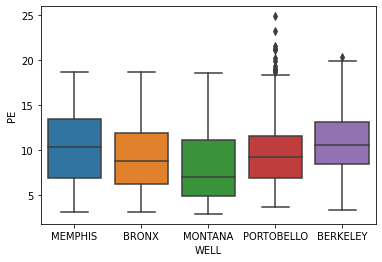

In [ ]:
sns.boxplot(x=data_total['WELL'], y=data_total['PE'])

In [ ]:
data_total.to_csv('all_data_norm_DTC.csv')